In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
import datetime as dt

In [2]:
final_invoice = pd.read_pickle('pickled/final_invoice.pkl')

In [3]:
final_invoice.columns

Index(['Unnamed: 0', 'Amt Rcvd From Custom', 'Amt Rcvd From Ins Co',
       'Area / Locality', 'CGST(14%)', 'CGST(2.5%)', 'CGST(6%)', 'CGST(9%)',
       'CITY', 'Cash /Cashless Type', 'Claim No.', 'Cust Type', 'Customer No.',
       'District', 'Expiry Date', 'Gate Pass Date', 'Gate Pass Time',
       'IGST(12%)', 'IGST(18%)', 'IGST(28%)', 'IGST(5%)', 'Insurance Company',
       'Invoice Date', 'Invoice No', 'Invoice Time', 'Job Card No',
       'JobCard Date', 'JobCard Time', 'KMs Reading', 'Labour Total', 'Make',
       'Misc Total', 'Model', 'ODN No.', 'OSL Total', 'Order Type',
       'Outstanding Amt', 'Parts Total', 'Pin code', 'Plant', 'Plant Name1',
       'Policy no.', 'Print Status', 'Recovrbl Exp', 'Regn No',
       'SGST/UGST(14%)', 'SGST/UGST(2.5%)', 'SGST/UGST(6%)', 'SGST/UGST(9%)',
       'Service Advisor Name', 'TDS amount', 'Technician Name',
       'Total Amt Wtd Tax.', 'Total CGST', 'Total GST', 'Total IGST',
       'Total SGST/UGST', 'Total Value', 'User ID'],
     

In [60]:
len(final_invoice['Customer No'].unique())

492314

In [4]:
rfm0 = final_invoice[['Customer No.', 'Invoice Date', 'Invoice Time', 'Invoice No', 'Total Amt Wtd Tax.']]

In [5]:
rfm0['date'] = pd.to_datetime(rfm0['Invoice Date'] + ' ' + rfm0['Invoice Time'])

<ipython-input-5-46ef15741aca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm0['date'] = pd.to_datetime(rfm0['Invoice Date'] + ' ' + rfm0['Invoice Time'])


In [6]:
rfm0.drop(['Invoice Date', 'Invoice Time'], axis='columns',inplace=True)

C:\Users\Baby\Anaconda3\envs\py38-basic-ml\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [36]:
rfm0.drop_duplicates()

,Customer No.,Invoice No,Total Amt Wtd Tax.,date
0,67849,7005200002,4051.95,2015-01-02 11:30:36
1,84419,7005200003,1001.29,2015-01-03 10:07:32
2,81055,7005200004,233.14,2015-01-03 11:12:57
3,84419,7005200005,0.00,2015-01-03 11:40:44
4,18980,7005200006,2747.12,2015-01-03 12:07:17
...,...,...,...,...
492309,203820,7231000017,4458.15,2016-06-30 14:56:58
492310,170411,7231000018,6832.08,2016-06-30 15:06:52
492311,48811,7231000019,9187.71,2016-06-30 15:43:56
492312,204067,7231000020,11100.00,2016-06-30 15:58:59


In [8]:
rfm0['date'].max(), rfm0['date'].min()

(Timestamp('2016-10-31 22:53:06'), Timestamp('2012-04-02 17:04:33'))

In [9]:
PRESENT = dt.datetime(2016,11,1)

In [62]:
rfm = rfm0.groupby('Customer No.').agg({'date': lambda date: (PRESENT - date.max()).days,
                                       'Invoice No': 'count',
                                       'Total Amt Wtd Tax.': lambda rev: rev.sum(),})
rfm.columns = ['recency', 'frequency', "monetary"]
rfm['recency'] = rfm['recency'].astype(int)

<IPython.core.display.Javascript object>


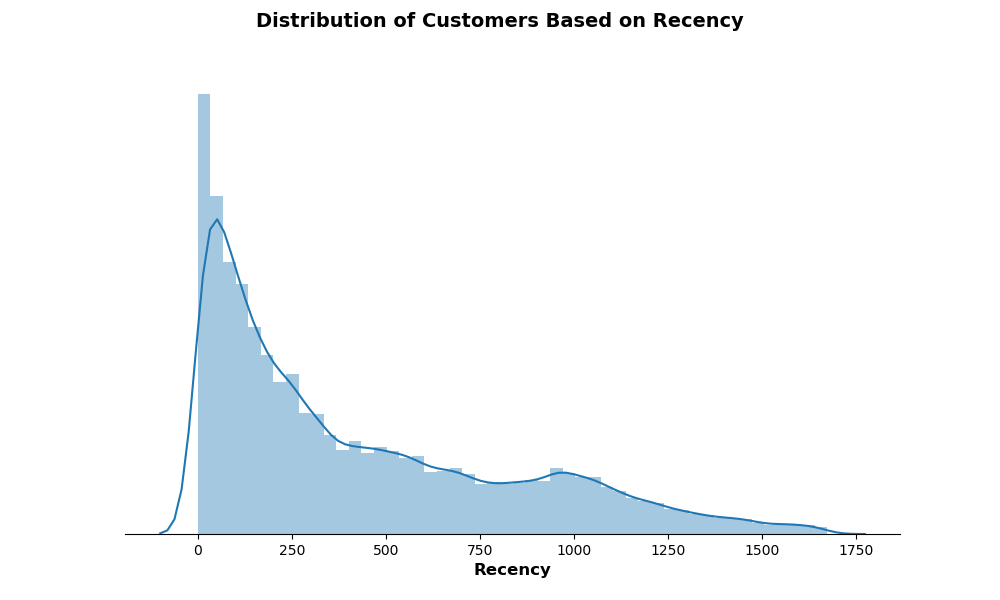

In [63]:
fig, ax = plt.subplots(1,1, figsize=[10,6])
sns.distplot(rfm['recency'])
ax.set_xlabel('Recency', fontsize=12, fontweight='semibold')
ax.set_yticks([])
plt.suptitle("Distribution of Customers Based on Recency", fontsize=14, fontweight='semibold')
sns.despine(left=True)
#plt.savefig(r'images/recency_distribution.png')

In [64]:
rfm.describe()

,recency,frequency,monetary
count,253484.000000,253484.000000,2.534840e+05
mean,427.899035,1.942190,8.535893e+03
std,401.075875,6.182509,3.361613e+04
min,0.000000,1.000000,-1.000000e-02
25%,97.000000,1.000000,5.042550e+02
50%,281.000000,1.000000,2.574190e+03
75%,684.000000,2.000000,8.213783e+03
max,1673.000000,2668.000000,1.185973e+07


<IPython.core.display.Javascript object>


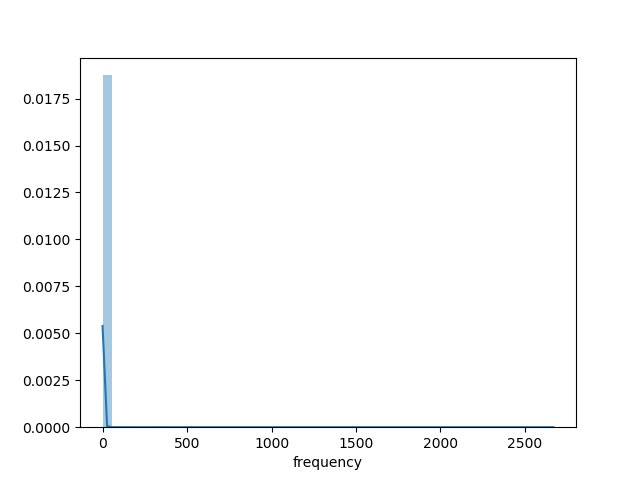

In [79]:
sns.distplot(rfm['frequency'])

In [81]:
rfm['frequency'].unique()

array([   4,    5,    2,    6,    7,    1,    3,   12,    9,   23,   13,
         14,   16,   11,    8,   10,   15,   19,   18,   24,   25,   26,
         17,   20,   22,   55,   44,   21,   42,   37,   27,   28,   45,
        441,  145,   41,   38,   64,  333,   30,   58,   33,   40,   29,
         71,   39,   62,  610,   75,   65,   46,   53,  105,   50,   36,
         51,   34,   32,  116,  688,   68,   31,  103,  111,   43,  324,
         99, 2668,   78,  136,  104,  126,   35,  251,  143,  360,  157],
      dtype=int64)

In [82]:
pd.cut(rfm['frequency'], 4)

Customer No.
1         (-1.667, 667.75]
10        (-1.667, 667.75]
100       (-1.667, 667.75]
1000      (-1.667, 667.75]
10000     (-1.667, 667.75]
                ...       
PLX241    (-1.667, 667.75]
PLX277    (-1.667, 667.75]
PLX312    (-1.667, 667.75]
PLX380    (-1.667, 667.75]
PLX386    (-1.667, 667.75]
Name: frequency, Length: 253484, dtype: category
Categories (4, interval[float64]): [(-1.667, 667.75] < (667.75, 1334.5] < (1334.5, 2001.25] < (2001.25, 2668.0]]

In [89]:
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['1', '2', '3', '4'])  # 1 Best
rfm['f_quartile'] = pd.cut(rfm['frequency'], 4, labels=['4', '3', '2', '1'])  # 1 Best
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['4', '3', '2', '1'])  # 1 Best

In [98]:
rfm['RFM_score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)

In [104]:
rfm[rfm['RFM_score']=='111']

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_score
Customer No.,,,,,,,
E4981,48,2668,11859728.34,1,1,1,111
